In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pure_data = pd.read_csv('sp500.csv', ',')
N = len(pure_data['Date'])
del pure_data['Date']
del pure_data['Open']
del pure_data['High']
del pure_data['Low']
del pure_data['Close']
del pure_data['Volume']
print(pure_data)

        Adj Close
0       17.090000
1       16.650000
2       16.940001
3       16.900000
4       17.350000
5       17.209999
6       17.230000
7       17.260000
8       17.330000
9       17.139999
10      17.490000
11      17.610001
12      17.340000
13      17.820000
14      17.860001
15      17.950001
16      18.070000
17      18.330000
18      18.200001
19      18.709999
20      18.650000
21      18.790001
22      19.260000
23      18.969999
24      19.139999
25      17.690001
26      17.670000
27      16.870001
28      17.590000
29      17.690001
...           ...
3513  2399.290039
3514  2390.899902
3515  2381.729980
3516  2415.820068
3517  2439.070068
3518  2431.770020
3519  2433.149902
3520  2438.300049
3521  2423.409912
3522  2425.179932
3523  2459.270020
3524  2472.540039
3525  2472.100098
3526  2476.830078
3527  2441.320068
3528  2425.550049
3529  2443.050049
3530  2476.550049
3531  2461.429932
3532  2500.229980
3533  2502.219971
3534  2519.360107
3535  2549.330078
3536  2553

In [3]:
series = pure_data.as_matrix()[:, 0]
print(series)

[   17.09        16.65        16.940001 ...,  2582.300049  2585.639893
  2585.639893]


In [4]:
changes = []
minValue = 0
maxValue = 0
for index, value in enumerate(series):
    if index > 0:
        prev = series[(index-1)]
        diff = (value-prev)/prev*100
        changes.append(diff)
        if diff > maxValue:
            maxValue = diff
        if diff < minValue:
            minValue = diff
print(minValue, maxValue)

-18.1954652474 14.1161357074


In [9]:
def frange(start, stop, step):
     x = start
     while x < stop:
         yield x
         x += step
         
def numberOfOccurrences(array, low, high):
    result = 0
    for value in array:
        if low < value <= high:
            result += 1
    return result
density = []
distribution = []
x = []
weeksUntilSte = 0
step = 0.1
for i in frange(minValue, maxValue+step, step):
    number = numberOfOccurrences(changes, i - step, i)
    x.append(i)
    weeksUntilSte += number
    density.append(number)
    distribution.append(weeksUntilSte / N)

In [10]:
print(density)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 4, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 3, 1, 0, 2, 2, 4, 4, 0, 7, 5, 5, 9, 9, 3, 7, 8, 8, 7, 9, 9, 9, 9, 8, 12, 15, 15, 14, 19, 28, 14, 24, 22, 30, 25, 30, 32, 42, 33, 49, 43, 46, 56, 50, 48, 62, 62, 59, 53, 66, 63, 65, 72, 83, 62, 79, 81, 88, 84, 86, 86, 95, 101, 88, 83, 70, 87, 94, 68, 61, 81, 68, 54, 57, 39, 28, 47, 43, 39, 28, 27, 25, 26, 24, 28, 20, 19, 11, 19, 8, 7, 10, 9, 13, 5, 6, 4, 10, 6, 7, 2, 4, 1, 5, 6, 2, 3, 4, 0, 5, 2, 1, 2, 2, 5, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

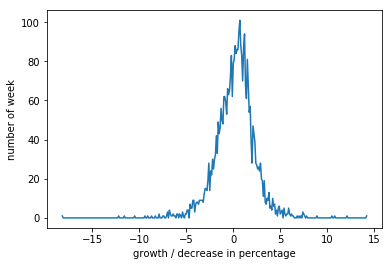

In [13]:
plt.plot(x, density)
plt.ylabel('number of week')
plt.xlabel('growth / decrease in percentage')
plt.show()

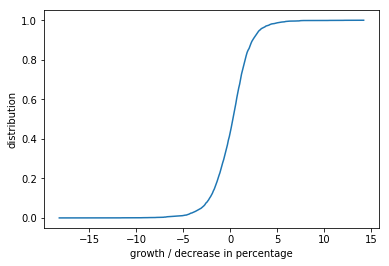

In [12]:
plt.plot(x, distribution)
plt.ylabel('distribution')
plt.xlabel('growth / decrease in percentage')
plt.show()

In [14]:
outline = 0.05
threshold = -20
for i, value in enumerate(distribution):
    if value < outline:
        threshold = i
threshold = x[threshold]
print(threshold)

-3.09546524741


So, if we want to separate only 5% of the worts weeks (=statistical outliers) -> we need to set up threshold on level 3,095% of decrease in 1 week. 

In [21]:
print('number of all data objects = ', N)
print('\n')
print('% outlier', '% drop', '№ objects', sep='\t')
for outline in frange(0.005, 0.15, 0.005):
    threshold = -20
    for i, value in enumerate(distribution):
        if value < outline:
            threshold = i
    threshold = x[threshold]
    print('%.3f' % round(outline, 3), '%.3f' % round(threshold, 3), '%.0f' % round(N*outline, 0), sep='\t')

number of all data objects =  3543


% outlier	% drop	№ objects
0.005	-6.895	18
0.010	-5.495	35
0.015	-4.695	53
0.020	-4.395	71
0.025	-4.195	89
0.030	-3.895	106
0.035	-3.695	124
0.040	-3.495	142
0.045	-3.295	159
0.050	-3.095	177
0.055	-2.995	195
0.060	-2.895	213
0.065	-2.795	230
0.070	-2.695	248
0.075	-2.695	266
0.080	-2.495	283
0.085	-2.495	301
0.090	-2.395	319
0.095	-2.295	337
0.100	-2.295	354
0.105	-2.195	372
0.110	-2.095	390
0.115	-2.095	407
0.120	-1.995	425
0.125	-1.995	443
0.130	-1.895	461
0.135	-1.895	478
0.140	-1.795	496
0.145	-1.795	514
